In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [5]:
# 채널 추가(차원 변경 3 -> 4)
print(x_train.shape, x_test.shape)
x_train_in = x_train[..., tf.newaxis]
x_test_in = x_test[...,tf.newaxis]
print(x_train_in.shape,x_test_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
# Sequential API를 이용한 간단 CNN 모델 생성
model = tf.keras.Sequential([
    # Convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), name = 'conv1'),
    # Max Polling
    tf.keras.layers.MaxPooling2D((2,2),name='pool'),
    # Classifier
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [11]:
13*13*32

5408

In [12]:
history = model.fit(x_train_in, y_train,
                    validation_data = (x_test_in, y_test),
                    epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2065 - accuracy: 0.9416 - val_loss: 0.0841 - val_accuracy: 0.9758
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0785 - accuracy: 0.9774 - val_loss: 0.0676 - val_accuracy: 0.9778
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0601 - accuracy: 0.9824 - val_loss: 0.0634 - val_accuracy: 0.9788
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0600 - val_accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0550 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0366 - accuracy: 0.9890 - val_loss: 0.0574 - val_accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.0525 -

In [13]:
model.evaluate(x_test_in,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0595 - accuracy: 0.9830


[0.05945206433534622, 0.9829999804496765]

In [21]:
import matplotlib.pyplot as plt
def plot_loss_acc(history,epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
  fig, axes = plt.subplots(1,2, figsize=(12,4))

  axes[0].plot(range(1,epoch +1),loss,label='Training')
  axes[0].plot(range(1,epoch +1),val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1,epoch +1),acc,label='Training')
  axes[1].plot(range(1,epoch +1),val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

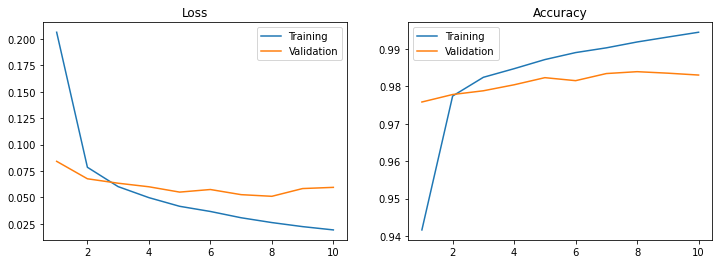

In [22]:
plot_loss_acc(history,10)

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv1_input')>

In [25]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>

In [26]:
model.layers

In [27]:
model.layers[0]

In [29]:
model.layers[1].input

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv1')>

In [33]:
model.layers[0].weights

[<tf.Variable 'conv1/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.1727228 ,  0.1572762 ,  0.26890168, -0.30213112,
            0.16018875, -0.9329452 ,  0.15046602, -0.6089733 ,
           -0.66168505, -0.6460207 ,  0.02271804,  0.08827655,
           -1.3742707 , -0.22918904,  0.7304541 , -0.4501832 ,
            0.22239995, -0.13730977, -0.659592  , -0.8318547 ,
           -0.03285872,  0.22496343,  0.0925182 ,  0.42660442,
           -0.06844126,  0.27395535,  0.07536878,  0.25895151,
           -0.31953257,  0.31866103,  0.28870794, -0.83290446]],
 
         [[-0.07630159,  0.2847182 ,  0.16319832,  0.04617283,
            0.1485917 , -1.0539148 ,  0.52595943,  0.04582354,
            0.29205355,  0.18501596,  0.34406587, -0.47534665,
           -0.9583559 ,  0.47546026,  0.623991  , -0.21472737,
           -0.21477848,  0.23154202, -0.6234751 , -0.08011708,
            0.25194088, -0.19028692,  0.2545279 , -0.4311289 ,
            0.17406988,  0.3247283 ,  0.6

In [34]:
model.layers[0].kernel

<tf.Variable 'conv1/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.1727228 ,  0.1572762 ,  0.26890168, -0.30213112,
           0.16018875, -0.9329452 ,  0.15046602, -0.6089733 ,
          -0.66168505, -0.6460207 ,  0.02271804,  0.08827655,
          -1.3742707 , -0.22918904,  0.7304541 , -0.4501832 ,
           0.22239995, -0.13730977, -0.659592  , -0.8318547 ,
          -0.03285872,  0.22496343,  0.0925182 ,  0.42660442,
          -0.06844126,  0.27395535,  0.07536878,  0.25895151,
          -0.31953257,  0.31866103,  0.28870794, -0.83290446]],

        [[-0.07630159,  0.2847182 ,  0.16319832,  0.04617283,
           0.1485917 , -1.0539148 ,  0.52595943,  0.04582354,
           0.29205355,  0.18501596,  0.34406587, -0.47534665,
          -0.9583559 ,  0.47546026,  0.623991  , -0.21472737,
          -0.21477848,  0.23154202, -0.6234751 , -0.08011708,
           0.25194088, -0.19028692,  0.2545279 , -0.4311289 ,
           0.17406988,  0.3247283 ,  0.678607  ,  0.34490

In [37]:
model.layers[0].bias

<tf.Variable 'conv1/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.20304576, -0.29495823, -0.31178048, -0.07047348, -0.26271796,
       -0.0208367 , -0.0671991 , -0.33042067, -0.06080954, -0.13308065,
       -0.2021825 , -0.22744264, -0.00998035, -0.03191086, -0.01881924,
       -0.27088353, -0.21081947, -0.33576426,  0.22695814, -0.08361544,
       -0.20221013, -0.14685561, -0.04896417, -0.00122185, -0.01534713,
       -0.25367644, -0.01382477, -0.3266216 , -0.33524892, -0.28991506,
       -0.10914356, -0.14071295], dtype=float32)>

In [38]:
model.get_layer('conv1')

In [39]:
# 샘플 이미지의 레이어별 출력 리스트
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]])

In [42]:
[layer.output for layer in model.layers[:2]]

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv1')>,
 <KerasTensor: shape=(None, 13, 13, 32) dtype=float32 (created by layer 'pool')>]

In [43]:
activator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_input (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [44]:
activations = activator.predict(x_train_in[0][tf.newaxis,...])

In [45]:
len(activations)

2

In [47]:
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

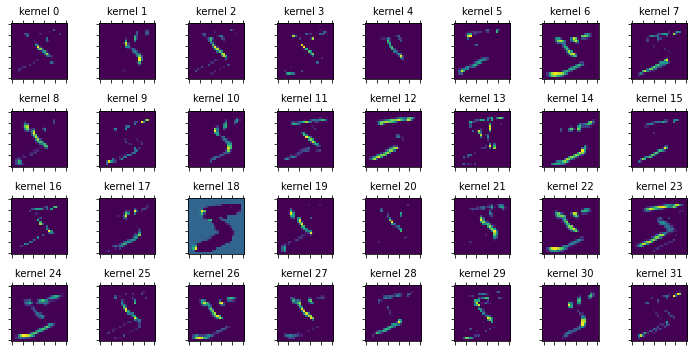

In [50]:
# Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8,i%8].matshow(conv_activation[0,:,:,i],cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i),fontsize=10)
  plt.setp(axes[i//8,i%8].get_xticklabels(),visible=False)
  plt.setp(axes[i//8,i%8].get_yticklabels(),visible=False)

plt.tight_layout()
plt.show()

In [52]:
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


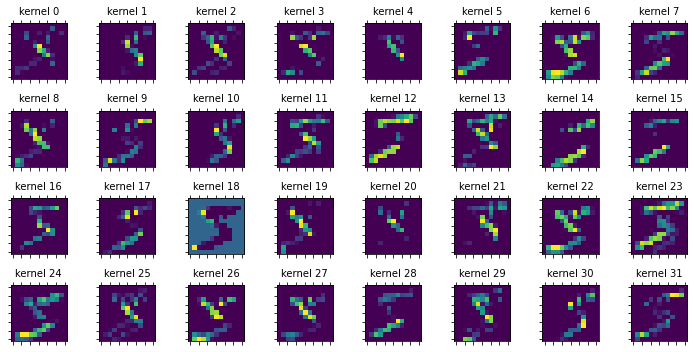

In [54]:
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8,i%8].matshow(pooling_activation[0,:,:,i],cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i),fontsize=10)
  plt.setp(axes[i//8,i%8].get_xticklabels(),visible=False)
  plt.setp(axes[i//8,i%8].get_yticklabels(),visible=False)

plt.tight_layout()
plt.show()